In [181]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [182]:
df = pd.read_csv('example2.csv')
dff=df
totalsample=dff.shape[0]
df.shape
print(totalsample)

995


In [183]:
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [184]:
df.isna().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

In [185]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [186]:
X = df.iloc[:,0:2].values
y = df['diabetes'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3)
X_traino=X_train
X_testo=X_test
Y_traino=y_train
Y_testo=y_test

In [187]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [188]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [189]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)
print("Classification Report\n\n",classification_report(y_test,y_pred))

Classification Report

               precision    recall  f1-score   support

           0       0.93      0.93      0.93       160
           1       0.94      0.93      0.93       172

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



In [190]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[149  11]
 [ 12 160]]


In [191]:
print('Accuracy score:',accuracy_score(y_test,y_pred))
y_predproba=model.predict_proba(X_test)
y_predprobatrain=model.predict_proba(X_train)

Accuracy score: 0.9307228915662651


0.9307228915662651 accuracy
0.935672514619883 precision

0.9302325581395349 recall

0.9329446064139941 f1 score

0.9773255813953488 AUC


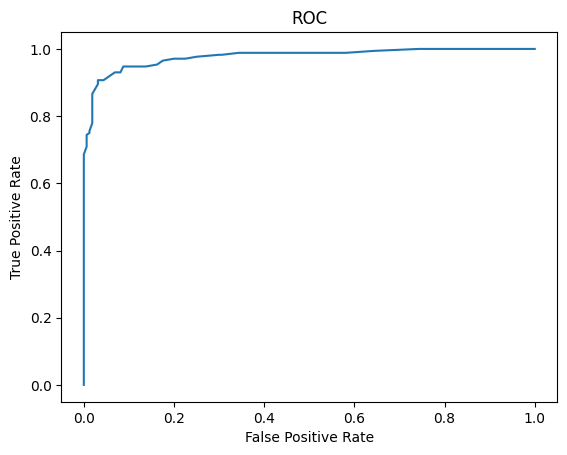

In [192]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predproba[:,1])

df = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
df.to_csv("roc21.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
print(accuracy_score(y_test,y_pred),"accuracy")
print(precision_score(y_test,y_pred),"precision")
print()
print(recall_score(y_test,y_pred),"recall")
print()
print(f1_score(y_test,y_pred),"f1 score")
print()
from sklearn.metrics import roc_curve, auc
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc,"AUC")

In [193]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)

In [194]:
fpr3, tpr3, thresholds3 = roc_curve(y_test,y_pred3)
auc_score7=roc_auc_score(y_test, y_pred3)
print(fpr3)
print(tpr3)
print(thresholds3)
print(auc_score7)
y_pred3 = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[0.      0.08125 1.     ]
[0.         0.89534884 1.        ]
[inf  1.  0.]
0.9070494186046512
[[147  13]
 [ 18 154]]


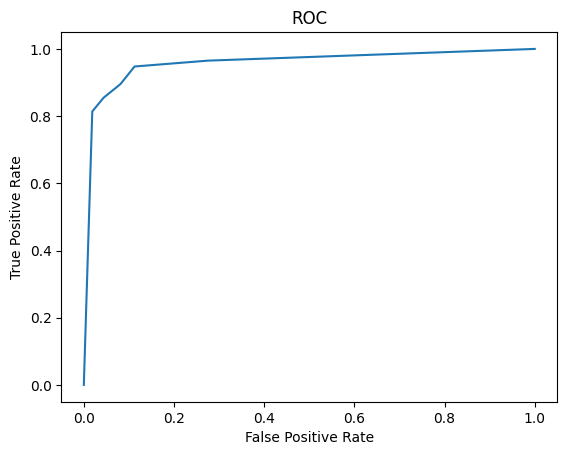

In [195]:
y_predproba12=knn.predict_proba(X_test)
false_positive_rate12, true_positive_rate12, thresholds12 = roc_curve(y_test, y_predproba12[:,1])
df6 = pd.DataFrame({'Threshold': thresholds12, 
              'TPR': true_positive_rate12, 
              'FPR':false_positive_rate12
             })
df6.to_csv("roc23.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate12, true_positive_rate12)

In [196]:
import sklearn.neural_network 
neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(4, ), activation='relu',alpha=1.e-5,solver='adam')
neural_network.fit(X_train, y_train) 
y_pred10 = neural_network.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(y_test, y_pred10)
from sklearn.metrics import roc_curve, auc
fpr10, tpr10, thresholds10 = roc_curve(y_test,y_pred10)
auc_score10=roc_auc_score(y_test, y_pred10)
print(fpr10)
print(tpr10)
print(thresholds10)
print(auc_score10)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(y_test, y_pred10)
print(cm10)

[0.      0.05625 1.     ]
[0.        0.9244186 1.       ]
[inf  1.  0.]
0.9340843023255814
[[151   9]
 [ 13 159]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


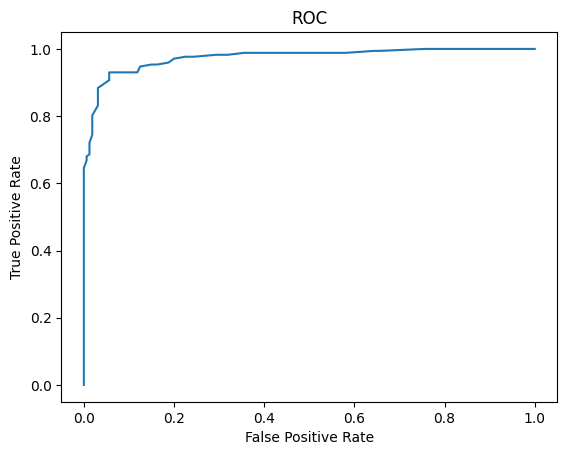

In [197]:
y_predproba11=neural_network.predict_proba(X_test)
false_positive_rate11, true_positive_rate11, thresholds11 = roc_curve(y_test, y_predproba11[:,1])
df3 = pd.DataFrame({'Threshold': thresholds11, 
              'TPR': true_positive_rate11, 
              'FPR':false_positive_rate11
             })
df3.to_csv("roc22.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate11, true_positive_rate11)

In [216]:
import openpyxl
wb=openpyxl.Workbook()
s1=wb.active
s1['A1']='Glucose'
s1['B1']='Blood'
s1['C1']='MP'
wb.save('output63.xlsx')
wb.save('output64.xlsx')

In [214]:
df1=dff[dff.diabetes==0]
class1evidence=df1.shape[0]/totalsample
print(class1evidence)
df2=dff[dff.diabetes==1]
class2evidence=df2.shape[0]/totalsample
print(class2evidence)

0.4994974874371859
0.5005025125628141


In [217]:
traintotal=X_traino.shape[0]

yp=[]
xp=[]
zp=[]
mp=[]
px=[]
py=[]
workbook=openpyxl.load_workbook('output63.xlsx')
sheet=workbook.active

for i in range(traintotal):
    if(Y_traino[i]==1):
        yp.append(y_predprobatrain[i,1])
        xp.append(X_traino[i,:])
        
testtotal=X_testo.shape[0]
for i in range(testtotal):
    if(Y_testo[i]==1):
        yp.append(y_predproba[i,1])
        xp.append(X_testo[i,:])
        
df12=dff[dff.diabetes==1]

for k in range(df12.shape[0]):
    zp.append(yp[k]*class2evidence)
    mp.append(0)


zsup=max(zp)
for k in range(df12.shape[0]):
    zp[k]=zp[k]/zsup

for i in range(df12.shape[0]):
    zz=0
    for j in range(df12.shape[0]):
        if(zp[i]>=zp[j]):
            zz=zz+1
    mp[i]=zz/df12.shape[0]

j=2
for k in range(len(yp)):
    if(mp[k]>=0.75):
        sheet.cell(j,1).value=xp[k][0]
        sheet.cell(j,2).value=xp[k][1]
        sheet.cell(j,3).value=mp[k]
        j+=1
workbook.save('output63.xlsx')
workbook=openpyxl.load_workbook('output64.xlsx')
sheet=workbook.active
jk=2
for k in range(len(yp)):
    if(yp[k]>=0.75):
        sheet.cell(jk,1).value=xp[k][0]
        sheet.cell(jk,2).value=xp[k][1]
        sheet.cell(jk,3).value=yp[k]
        jk+=1

workbook.save('output64.xlsx')



[40 87]
